Importing libraries

In [263]:
# Import for exploration and visualization
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

# import sklearn and xgboost libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold


### Data exploration ###

In [264]:
# Use panda to read the csv, using the head() method you can check the first 5 rows
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [265]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [266]:
train.info()
# The .info() method gives a quick summary of the df structure.
# In this case, the dataset has 891 rows and 12 columns.
# For each column, it shows:
#   - The column index (position in the df)
#   - The column name
#   - The number of non-null (non-missing) values
#   - The data type (dtype) of the column
# This information is useful for:
#   - Detecting missing values
#   - Understanding data types before cleaning or transformation
#   - Getting a sense of the dataset size and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [267]:
train.describe() # describe gives you statistical summaries of the df
# count	Number of non-missing values
# mean  -   Average value
# std   -   Standard deviation (spread of data)
# min   -	Minimum value
# 25%   -	1st quartile (25% of data ≤ this value)
# 50%   -   Median (middle value)
# 75%   -	3rd quartile (75% of data ≤ this value)
# max   -	Maximum value

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [268]:
train.describe(include='object')
# you can use this to include objects to get info in the non-numeric columns
# unique    -   number of distinct values
# top       -   most common value
# freq      -   how many times that top value appears   

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [269]:
# Using describe() shows that most passengers did not survive. 
# This means the 'Survived' column can be used as a target variable to analyze and compare the characteristics of survivors vs. non-survivors in the dataset.
survi_mean = train.groupby("Survived").mean(numeric_only=True)
survi_0 = survi_mean.iloc[0,:] # avergage values of passenger that DID not survive
survi_1 = survi_mean.iloc[1,:] # avergage values of passenger DID not survive
# Relative difference calculation
# This highlights which features differ most proportionally between the two groups, helping identify potential predictors of survival.
abs((survi_1 - survi_0) / (survi_0 + survi_1))

PassengerId    0.002971
Pclass         0.129755
Age            0.038706
SibSp          0.077914
Parch          0.170176
Fare           0.372661
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

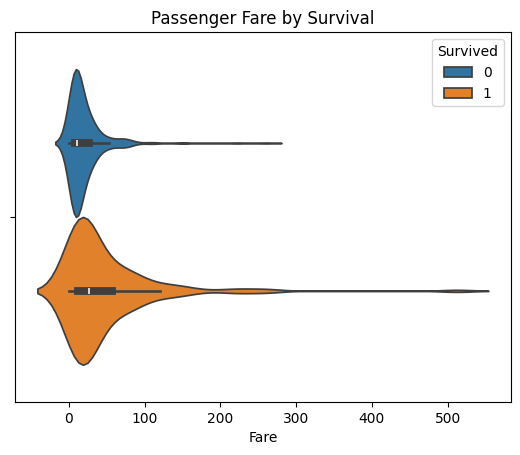

In [270]:
# The relative differences show that Fare, Parch, and Pclass matter the most for survival.
# Let's explore these features further to understand their impact,
# which will help us gauge how much importance our XGBoost model should assign to them.
# Fare by survival
sns.violinplot(x="Fare", hue="Survived", data=train)
plt.title("Passenger Fare by Survival")
plt.show

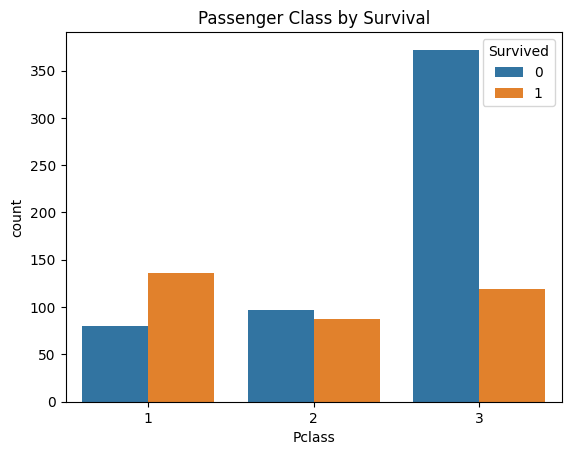

In [271]:
# Pclass by survival
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Passenger Class by Survival")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

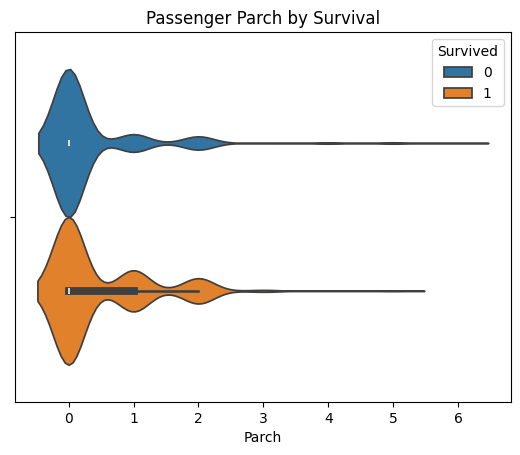

In [272]:
# Parch by survival
sns.violinplot(x="Parch", hue="Survived", data=train)
plt.title("Passenger Parch by Survival")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

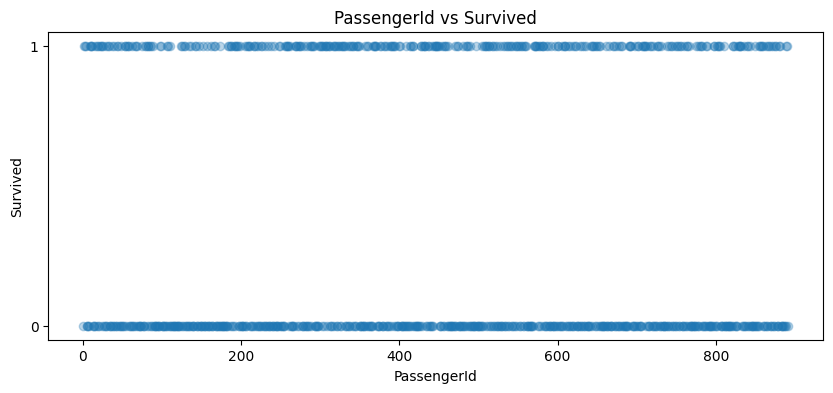

In [273]:
# For context, let's see the PassengerId value impact so we can see how little it matters
plt.figure(figsize=(10,4))
plt.scatter(train["PassengerId"], train["Survived"], alpha=0.3)
plt.xlabel("PassengerId")
plt.ylabel("Survived")
plt.title("PassengerId vs Survived")
plt.yticks([0,1])
plt.show

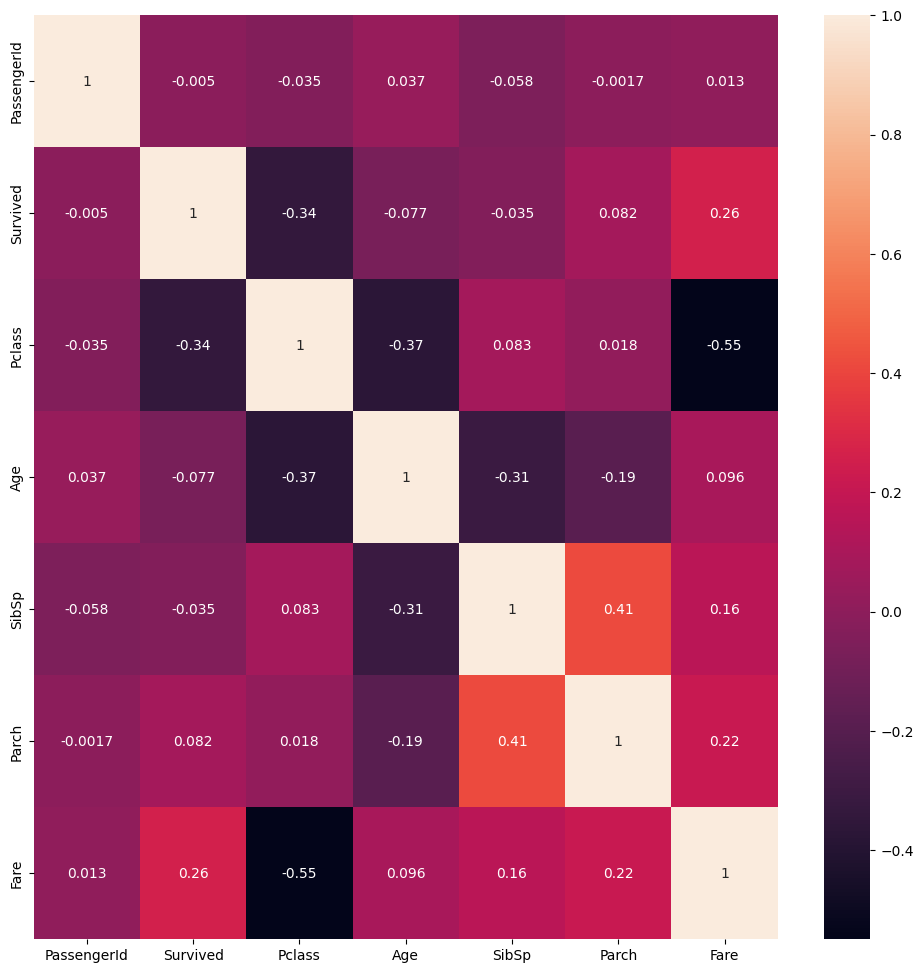

In [274]:
# Calculate the correlation matrix for all numeric features in the dataset.
# Then plot a heatmap to visually inspect the strength and direction of linear relationships between pairs of numeric variables.
# The heatmap's colors and annotated values help identify which features are strongly
# positively or negatively correlated, which is useful for feature selection and understanding data structure.
corr = train.select_dtypes(include="number").corr()
plt.subplots(figsize=(12, 12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

In [275]:
# Analyzing this, we can check that, for example, the correlation with Survival is:
# -0.005 with PassengerID, Almost no correlation, meaning that it has practically no correlation
# 1 with Survived, perfect correlation with itself, for obvious reasons
# -0.34 with Pclass, Moderate negative correlation, higher class (lower number) means MORE likely to survive
# -0.077 with Age, Weak negative correlation, younger passengers slightly more likely to survive
# -0.035 with SibSp, Weak negative correlation, having siblings/spouses means almost nothing when it comes to survive
# 0.082 with Parch, Weak positive correlation, having parents/childrens means almost nothing when it comes to survive
# 0.26 with Fare, Moderate positive correlation, paying higher fares increases chance of survival+

### Preprocessing data ###

In [276]:
print(train["Name"].head())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


In [277]:
# Extract title using regex
train["title"] = train["Name"].str.extract(r",\s*([^\.\"]+)\.", expand=False)

# Map titles to numeric codes using a dictionary
title_mapping = {
    "Mr": 1,
    "Master": 3,
    "Ms": 4, "Mlle": 4, "Miss": 4,
    "Mme": 5, "Mrs": 5
}

# Map titles, assign 2 to all others (including unknown)
train["title"] = train["title"].map(title_mapping).fillna(2).astype(int)

print(train["title"])


0      1
1      5
2      4
3      5
4      1
      ..
886    2
887    4
888    4
889    1
890    1
Name: title, Length: 891, dtype: int32


In [278]:
# Convert Fare to True if above average, else False
meanfare = train["Fare"].mean()
train["Fare"] = train["Fare"] > meanfare
print(train["Fare"])

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool


In [279]:
# With that, lets start from droping some values we don't need.
train = train.drop(["PassengerId","Name","Ticket"], axis="columns")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    bool   
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   title     891 non-null    int32  
dtypes: bool(1), float64(1), int32(1), int64(4), object(3)
memory usage: 60.2+ KB


In [280]:
# Lets replace the values of sex with numbers so its easier for the model to work with
train["Sex"] = train["Sex"].replace(["male", "female"], [0,1])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    bool   
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   title     891 non-null    int32  
dtypes: bool(1), float64(1), int32(1), int64(5), object(2)
memory usage: 60.2+ KB


In [281]:
# Since cabin either is null or has a random alphanumeric value, lets make it a boolean
train["Cabin"] = train["Cabin"].isna()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    bool   
 7   Cabin     891 non-null    bool   
 8   Embarked  889 non-null    object 
 9   title     891 non-null    int32  
dtypes: bool(2), float64(1), int32(1), int64(5), object(1)
memory usage: 54.1+ KB


In [282]:
mean_ages = train.groupby("title")["Age"].agg("mean")
print(mean_ages)

title
1    32.368090
2    45.545455
3     4.574167
4    21.845638
5    35.788991
Name: Age, dtype: float64


In [283]:
# Mapping from title to age to fill missing values
title_age_map = {
    1:32,
    2:45,
    3:7,
    4:23,
    5:35,
}

# Fill missing Age values based on title
train["Age"] = train["Age"].fillna(train["title"].map(title_age_map))

# Fill any remaining missings using the mean
mean_age =  train["Age"].mean()
train["Age"] = train["Age"].fillna(mean_age)
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch   Fare  Cabin Embarked  title
0         0       3    0  22.0      1      0  False   True        S      1
1         1       1    1  38.0      1      0   True  False        C      5
2         1       3    1  26.0      0      0  False   True        S      4
3         1       1    1  35.0      1      0   True  False        S      5
4         0       3    0  35.0      0      0  False   True        S      1

In [284]:
# Converts categorical variables in the DataFrame into one-hot encoded columns, creating new binary columns for each category value,so machine learning models can process categorical data easily
train = pd.get_dummies(train)
# So now we do this again after the data treatment
survi_mean = train.groupby("Survived").mean()
survi_0 = survi_mean.iloc[0,:] 
survi_1 = survi_mean.iloc[1,:] 
abs((survi_1 - survi_0) / (survi_0 + survi_1))

Pclass        0.129755
Sex           0.643977
Age           0.040050
SibSp         0.077914
Parch         0.170176
Fare          0.408208
Cabin         0.185190
title         0.374197
Embarked_C    0.331221
Embarked_Q    0.012168
Embarked_S    0.101449
dtype: float64

### Modeling ###

In [303]:
# Remove the Survived column from train and assign it to y (target variable), leaving train with only feature columns which we assign to x (input features)
y = train.pop("Survived")
x = train
x

KeyError: 'Survived'

In [ ]:
# Basic XGBoost classifier usage
model = XGBClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.8603351955307262


In [ ]:
# We check the prediction the model does for survivors
pred = model.predict(x_test)
print("Survived", sum(pred != 0))

Survived 59


In [ ]:
# We check the prediction the model does for non-survivors
pred = model.predict(x_test)
print("Not Survived", sum(pred == 0))

Not Survived 120


In [ ]:
# We use a confusion matrix to check how many TN, FP, FN and TP we have.
# [[TN, FP],   <-- First row: True Negatives (TN), False Positives (FP)
#  [FN, TP]]   <-- Second row: False Negatives (FN), True Positives (TP)
conmatrix = confusion_matrix(y_test, pred)
conmatrix

array([[106,  11],
       [ 14,  48]], dtype=int64)

In [ ]:
# We obtained 86% accuracy with XGBoost model, now we might want to adjust its hyperparameter using GridSearch
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = XGBClassifier(random_state=42)  # fixes XGBoost's own RNG
ran_grid = {"eta": np.linspace(0, 0.5, num=12)}

ran = GridSearchCV(model, ran_grid, cv=cv_splitter)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=11
)

ran.fit(x_train, y_train)
print(ran.best_score_)
print(ran.best_params_)

0.8146951639909386
{'eta': 0.045454545454545456}


In [ ]:
# We adjust max_depth
model = XGBClassifier(eta = 0.045454545454545456)
random_grid = {"max_depth": range(1,20,1)}

ran = GridSearchCV(model, random_grid, cv=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
ran.fit(x_train, y_train)
print(ran.best_score_)
ran.best_params_

0.8216290751502019


{'max_depth': 6}

In [ ]:
# We adjust min_child_weight
model = XGBClassifier(eta = 0.045454545454545456, max_depth = 6)
random_grid = {"min_child_weight": range(1,20,1)}

ran = GridSearchCV(model, random_grid, cv=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
ran.fit(x_train, y_train)
print(ran.best_score_)
ran.best_params_


0.8216290751502019


{'min_child_weight': 1}

In [ ]:
# We adjust gamma
model = XGBClassifier(eta = 0.045454545454545456, max_depth = 6, min_child_weight=1)
random_grid = {"gamma" : [i / 10.0 for i in range(0, 11)]}

ran = GridSearchCV(model, random_grid, cv=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
ran.fit(x_train, y_train)
print(ran.best_score_)
ran.best_params_

0.821638924455826


{'gamma': 0.3}

In [ ]:
# We adjust subsample
model = XGBClassifier(eta=0.045454545454545456, max_depth=6, min_child_weight=1, gamma=0.3)
random_grid = {"subsample": [i / 100.0 for i in range(50, 101, 5)]}

ran = GridSearchCV(model, random_grid, cv=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
ran.fit(x_train, y_train)
print(ran.best_score_)
print(ran.best_params_)

0.821638924455826
{'subsample': 1.0}


In [ ]:
# We adjust comsample_bytree
model = XGBClassifier(eta=0.045454545454545456, max_depth=6, min_child_weight=1, gamma=0.3, subsample=1.0)
random_grid = {"colsample_bytree": [i / 10.0 for i in range(5, 11)]}  # 0.5 to 1.0

ran = GridSearchCV(model, random_grid, cv=5)
ran.fit(x_train, y_train)
print(ran.best_score_)
print(ran.best_params_)

0.821638924455826
{'colsample_bytree': 1.0}


In [ ]:
# We adjust reg_alpha
model = XGBClassifier(
    eta=0.045454545454545456,
    max_depth=6,
    min_child_weight=1,
    gamma=0.3,
    subsample=1.0,
    colsample_bytree=1.0
)
random_grid = {"reg_alpha": [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

ran = GridSearchCV(model, random_grid, cv=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
ran.fit(x_train, y_train)
print(ran.best_score_)
print(ran.best_params_)

0.8258544272628778
{'reg_alpha': 0.05}


In [ ]:
# We check how we doing isn 92,17% accuracy
model = XGBClassifier(
    eta=0.045454545454545456,
    max_depth=6,
    min_child_weight=1,
    gamma=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha = 0.05
)

model.fit(x, y)
print(model.score(x_test, y_test))
pred = model.predict(x_test)
print("Survived", sum(pred!=0))
print("Not Survived", sum(pred==0))

conmatrix = confusion_matrix(y_test, pred)
conmatrix

0.9217877094972067
Survived 57
Not Survived 122


array([[113,   5],
       [  9,  52]], dtype=int64)

We train the XGBoost model with the best hyperparameters found via GridSearchCV
We achieve 92.17% accuracy on the test set (x_test, y_test)
Then we predict the 'Survived' labels and print how many passengers the model predicts survived and not survived
Finally, we compute the confusion matrix to evaluate performance in detail:
 - 113 true negatives (correctly predicted not survived)
 - 52 true positives (correctly predicted survived)
 - 5 false positives (predicted survived but actually did not survive)
 - 9 false negatives (predicted not survived but actually survived)